# ECG Hearbeat Classification

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import os

In [5]:
dfs = [pd.read_csv('../content/ptbdb_' + x + '.csv') for x in ['normal', 'abnormal']]

In [6]:
for df in dfs:
    df.columns = list(range(len(df.columns)))

In [7]:
data = pd.concat(dfs, axis=0).sample(frac=1.0, random_state=1).reset_index(drop=True)

data = data.rename({187: 'Label'}, axis=1)

In [8]:
data

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,Label
0,1.000000,0.887073,0.774146,0.713224,0.682021,0.699851,0.595840,0.552749,0.469539,0.481426,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.000000,0.684376,0.395907,0.288863,0.262102,0.231405,0.234160,0.218811,0.207399,0.212121,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.000000,0.645543,0.270195,0.089833,0.038997,0.064067,0.045265,0.062674,0.059192,0.057799,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.995881,0.993821,0.959835,0.872297,0.542739,0.054583,0.000000,0.098867,0.156540,0.302781,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.996020,0.323383,0.109453,0.035821,0.264677,0.342289,0.367164,0.402985,0.401990,0.420896,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14545,1.000000,0.979786,0.621879,0.146849,0.000000,0.266944,0.356718,0.421522,0.450059,0.457788,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14546,1.000000,0.648015,0.424677,0.315160,0.223816,0.156384,0.156863,0.122908,0.093735,0.122908,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14547,0.931217,1.000000,0.465201,0.150183,0.035409,0.033374,0.049247,0.070818,0.078958,0.087505,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14548,1.000000,0.588291,0.120570,0.056962,0.136076,0.181646,0.182595,0.185759,0.178481,0.186076,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##Preprocessing

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
y = data['Label'].copy()
X = data.drop('Label', axis=1).copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=1)

In [11]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,177,178,179,180,181,182,183,184,185,186
8540,1.000000,0.834705,0.358711,0.163923,0.096708,0.100137,0.137860,0.131001,0.131001,0.147462,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
10734,1.000000,0.783220,0.479365,0.206803,0.010884,0.078912,0.107937,0.113832,0.116553,0.113832,...,0.063492,0.070748,0.094785,0.142404,0.149206,0.155102,0.0,0.0,0.0,0.0
13652,1.000000,0.789198,0.247764,0.000000,0.039662,0.105148,0.115274,0.105654,0.109030,0.108017,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
5014,1.000000,0.783092,0.592754,0.418357,0.347826,0.314976,0.289372,0.275362,0.267150,0.276812,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
11630,0.990495,0.670835,0.302151,0.000000,0.068534,0.074537,0.141571,0.253127,0.309155,0.310155,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,1.000000,0.668866,0.334133,0.069586,0.106179,0.244151,0.262148,0.238152,0.240552,0.246551,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
5192,0.970892,0.406573,0.051643,0.065728,0.184038,0.205634,0.238498,0.227230,0.234742,0.271362,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
12172,1.000000,0.770696,0.600526,0.543364,0.500657,0.496058,0.500657,0.523653,0.519054,0.520368,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
235,1.000000,0.814031,0.646993,0.079065,0.063474,0.122494,0.208241,0.231626,0.263920,0.279510,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0


In [12]:
y_train

8540     0.0
10734    0.0
13652    0.0
5014     1.0
11630    1.0
        ... 
905      1.0
5192     1.0
12172    1.0
235      1.0
13349    1.0
Name: Label, Length: 10185, dtype: float64

In [13]:
X_train.shape

(10185, 187)

In [14]:
y_train.shape

(10185,)

## RNN Model

### Model 1: GRU

In [15]:
from tensorflow.keras import layers
# Creating model_1 (GRU)
inputs = layers.Input(shape=(X_train.shape[1],))
expand = tf.expand_dims(inputs, axis=2)
gru = layers.GRU(256, return_sequences=True)(expand)
flatten = layers.Flatten()(gru)
outputs = layers.Dense(1, activation='sigmoid')(flatten)
model_1 = tf.keras.Model(inputs=inputs, outputs=outputs)

In [16]:
model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 187)]             0         
                                                                 
 tf.expand_dims (TFOpLambda  (None, 187, 1)            0         
 )                                                               
                                                                 
 gru (GRU)                   (None, 187, 256)          198912    
                                                                 
 flatten (Flatten)           (None, 47872)             0         
                                                                 
 dense (Dense)               (None, 1)                 47873     
                                                                 
Total params: 246785 (964.00 KB)
Trainable params: 246785 (964.00 KB)
Non-trainable params: 0 (0.00 Byte)
_____________________

In [17]:
callbacks= tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                            patience=5,
                                            restore_best_weights=True)

In [18]:
# Compiling the model_1
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [19]:
# Fitting the model_1
history_model_1 = model_1.fit(X_train,
                              y_train,
                              epochs=100,
                              batch_size=32,
                              validation_split=0.2,
                              callbacks=[callbacks])

Epoch 1/100
255/255 [==============================] - 7s 14ms/step - loss: 0.4593 - accuracy: 0.7760 - val_loss: 0.4086 - val_accuracy: 0.8007
Epoch 2/100
255/255 [==============================] - 3s 11ms/step - loss: 0.4024 - accuracy: 0.8117 - val_loss: 0.3977 - val_accuracy: 0.7953
Epoch 3/100
255/255 [==============================] - 3s 13ms/step - loss: 0.3694 - accuracy: 0.8303 - val_loss: 0.3476 - val_accuracy: 0.8439
Epoch 4/100
255/255 [==============================] - 3s 12ms/step - loss: 0.3386 - accuracy: 0.8497 - val_loss: 0.3497 - val_accuracy: 0.8351
Epoch 5/100
255/255 [==============================] - 3s 11ms/step - loss: 0.3067 - accuracy: 0.8715 - val_loss: 0.3198 - val_accuracy: 0.8733
Epoch 6/100
255/255 [==============================] - 3s 13ms/step - loss: 0.2690 - accuracy: 0.8908 - val_loss: 0.2854 - val_accuracy: 0.8822
Epoch 7/100
255/255 [==============================] - 3s 12ms/step - loss: 0.2388 - accuracy: 0.9072 - val_loss: 0.2094 - val_accuracy:

In [20]:
results_GRU = model_1.evaluate(X_test, y_test, verbose=0)

In [21]:
print(f"Test Accuracy model_1 (GRU): {results_GRU[1] * 100:.2f}%")

Test Accuracy model_1 (GRU): 97.50%


In [34]:
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.

  Args:
    history: TensorFlow model History object
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

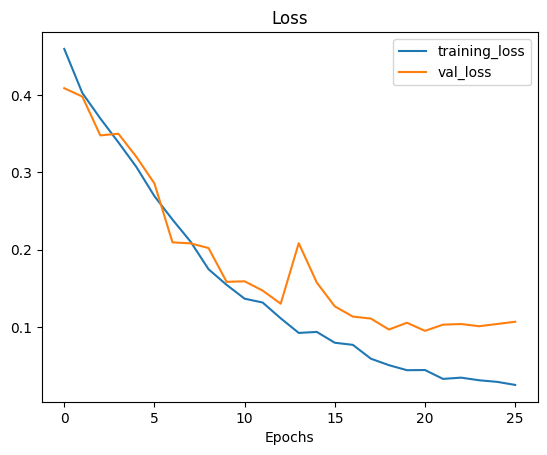

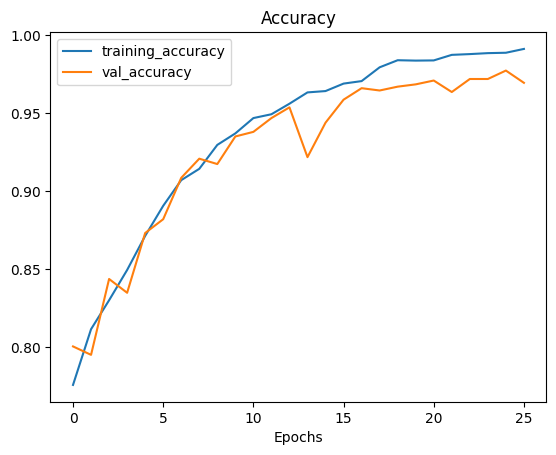

In [35]:
plot_loss_curves(history_model_1)

## Model 2: LSTM

In [22]:
# Creating model_2 (lstm)
inputs =layers.Input(shape=(X_train.shape[1],))
expand = tf.expand_dims(inputs, axis=2)
lstm = layers.LSTM(256, return_sequences=True)(expand)
flatten = layers.Flatten()(lstm)
outputs = layers.Dense(1, activation='sigmoid')(flatten)
model_2 = tf.keras.Model(inputs=inputs, outputs=outputs)

# Compiling the model_2
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [23]:
model_2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 187)]             0         
                                                                 
 tf.expand_dims_1 (TFOpLamb  (None, 187, 1)            0         
 da)                                                             
                                                                 
 lstm (LSTM)                 (None, 187, 256)          264192    
                                                                 
 flatten_1 (Flatten)         (None, 47872)             0         
                                                                 
 dense_1 (Dense)             (None, 1)                 47873     
                                                                 
Total params: 312065 (1.19 MB)
Trainable params: 312065 (1.19 MB)
Non-trainable params: 0 (0.00 Byte)
_______________________

In [24]:
# Fitting the model_2
history_model_2 = model_2.fit(X_train,
                              y_train,
                              epochs=100,
                              batch_size=32,
                              validation_split=0.2,
                              callbacks=[callbacks])

Epoch 1/100
255/255 [==============================] - 6s 17ms/step - loss: 0.4730 - accuracy: 0.7629 - val_loss: 0.4239 - val_accuracy: 0.7899
Epoch 2/100
255/255 [==============================] - 3s 12ms/step - loss: 0.4214 - accuracy: 0.7973 - val_loss: 0.3896 - val_accuracy: 0.8277
Epoch 3/100
255/255 [==============================] - 3s 12ms/step - loss: 0.3927 - accuracy: 0.8162 - val_loss: 0.3663 - val_accuracy: 0.8257
Epoch 4/100
255/255 [==============================] - 3s 12ms/step - loss: 0.3480 - accuracy: 0.8390 - val_loss: 0.3159 - val_accuracy: 0.8581
Epoch 5/100
255/255 [==============================] - 4s 14ms/step - loss: 0.3125 - accuracy: 0.8571 - val_loss: 0.2885 - val_accuracy: 0.8763
Epoch 6/100
255/255 [==============================] - 3s 12ms/step - loss: 0.2753 - accuracy: 0.8802 - val_loss: 0.2949 - val_accuracy: 0.8758
Epoch 7/100
255/255 [==============================] - 3s 13ms/step - loss: 0.2316 - accuracy: 0.9030 - val_loss: 0.2286 - val_accuracy:

In [25]:
results_LSTM = model_2.evaluate(X_test, y_test, verbose=0)

In [26]:
print(f"Test Accuracy model_2 (LSTM): {results_LSTM[1] * 100:.2f}%")

Test Accuracy model_2 (LSTM): 98.72%


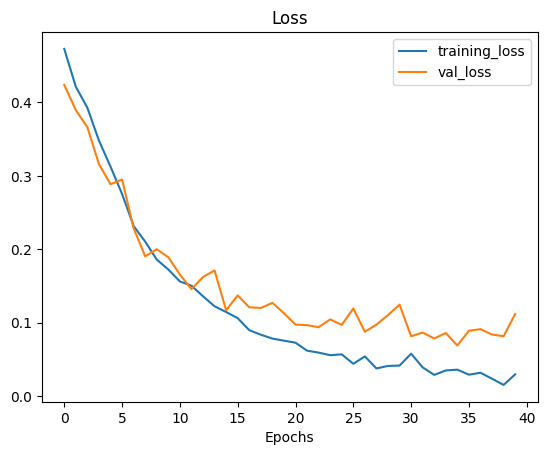

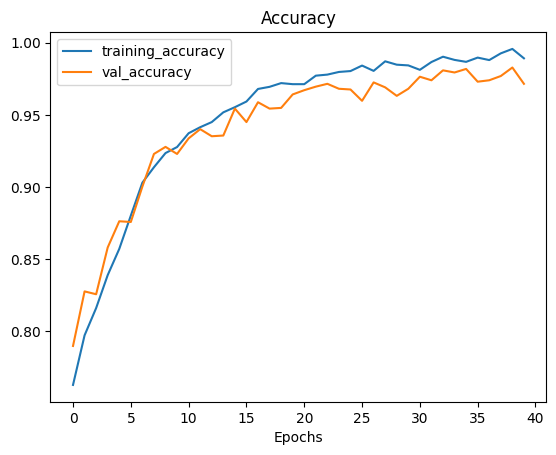

In [36]:
plot_loss_curves(history_model_2)

## Model 3: CNN

In [27]:
inputs = layers.Input(shape=(X_train.shape[1],))
expand = tf.expand_dims(inputs, axis=2)
x = layers.Conv1D(16, kernel_size=5, activation="relu", padding="valid", trainable=False)(expand)
x = layers.Conv1D(16, kernel_size=5, activation="relu", padding="valid", trainable=False)(x)
x = layers.MaxPool1D(pool_size=2)(x)
x = layers.Dropout(rate=0.1)(x)
x = layers.Conv1D(32, kernel_size=3, activation="relu", padding="valid", trainable=False)(x)
x = layers.Conv1D(32, kernel_size=3, activation="relu", padding="valid", trainable=False)(x)
x = layers.MaxPool1D(pool_size=2)(x)
x = layers.Dropout(rate=0.1)(x)
x = layers.Conv1D(32, kernel_size=3, activation="relu", padding="valid", trainable=False)(x)
x = layers.Conv1D(32, kernel_size=3, activation="relu", padding="valid", trainable=False)(x)
x = layers.MaxPool1D(pool_size=2)(x)
x = layers.Dropout(rate=0.1)(x)
x = layers.Conv1D(256, kernel_size=3, activation="relu", padding="valid", trainable=False)(x)
x = layers.Conv1D(256, kernel_size=3, activation="relu", padding="valid", trainable=False)(x)
x = layers.GlobalMaxPool1D()(x)
x = layers.Dropout(rate=0.2)(x)

outputs = layers.Dense(1, activation="sigmoid")(x)

model_3 = tf.keras.Model(inputs=inputs, outputs=outputs)

In [28]:
# Compiling the model_3
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [29]:
# Fitting the model_3
history_model_3 = model_3.fit(X_train,
                              y_train,
                              epochs=100,
                              batch_size=32,
                              validation_split=0.2,
                              callbacks=[callbacks])

Epoch 1/100
255/255 [==============================] - 6s 8ms/step - loss: 0.6604 - accuracy: 0.7124 - val_loss: 0.6342 - val_accuracy: 0.7369
Epoch 2/100
255/255 [==============================] - 1s 4ms/step - loss: 0.6176 - accuracy: 0.7214 - val_loss: 0.6043 - val_accuracy: 0.7369
Epoch 3/100
255/255 [==============================] - 1s 5ms/step - loss: 0.5994 - accuracy: 0.7214 - val_loss: 0.5902 - val_accuracy: 0.7369
Epoch 4/100
255/255 [==============================] - 1s 5ms/step - loss: 0.5928 - accuracy: 0.7214 - val_loss: 0.5840 - val_accuracy: 0.7369
Epoch 5/100
255/255 [==============================] - 1s 5ms/step - loss: 0.5906 - accuracy: 0.7214 - val_loss: 0.5813 - val_accuracy: 0.7369
Epoch 6/100
255/255 [==============================] - 1s 5ms/step - loss: 0.5898 - accuracy: 0.7214 - val_loss: 0.5798 - val_accuracy: 0.7369
Epoch 7/100
255/255 [==============================] - 1s 5ms/step - loss: 0.5897 - accuracy: 0.7214 - val_loss: 0.5790 - val_accuracy: 0.7369

In [30]:
results_CNN = model_3.evaluate(X_test, y_test, verbose=0)

In [31]:
print(f"Test Accuracy model_3 (CNN): {results_CNN[1] * 100:.2f}%")

Test Accuracy model_3 (CNN): 71.62%


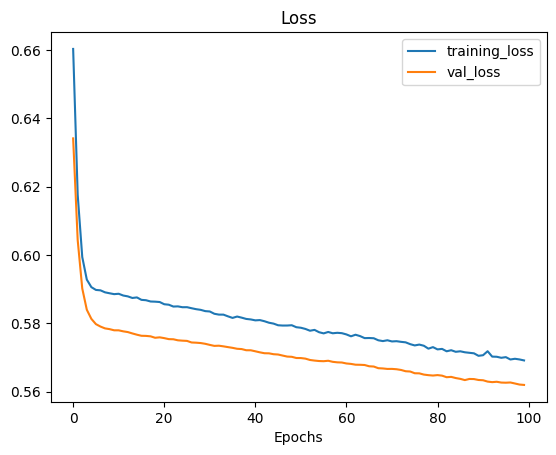

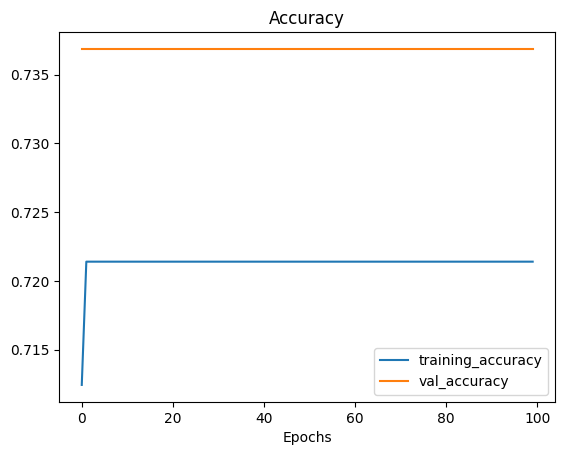

In [37]:
plot_loss_curves(history_model_3)

### Model 2- LSTM model performed the best